<p style= "background-color:brown;font-family:Georgia;color:#FEFBE9;font-size:250%;text-align:center;border-radius:50px 50px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b> Exploratory Data Analysis </b></p> 

<div style="float:center;margin-left:10px;max-width:250%;">

<img src ='https://editor.analyticsvidhya.com/uploads/61798ti2.png'>

</div>

<p style ='font-family:Lucida Console; text-align:left; color: green;font-size:18px'> Libraries: </p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<p style ='font-family:Lucida Console; text-align:left; color: green;font-size:18px'> Load & Read Data: </p>

In [3]:
df = pd.read_csv("../input/salesdata-1022/Occasional Sales Data.csv", encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Electric,1,23950.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Electric,3,24934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Electric,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Electric,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Electric,2,23877.0,NaN,NaN


In [4]:
df.shape

(11251, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Drop Columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [7]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Electric,1,23950.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Electric,3,24934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Electric,3,23924.0


<p style= "background-color:brown;font-family:Georgia;color:#FEFBE9;font-size:150%;text-align:center;border-radius:50px 50px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b> Handling Missing Values </b></p> 

In [8]:
# Checking Null Values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
# Checking Null Values - Alternative Approach
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# Drop Null Values
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [12]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

<p style ='font-family:Lucida Console; text-align:left; color: green;font-size:18px'> Changing Data Type </p>

In [13]:
df['Amount'] = df['Amount'].astype('int')  # Changing Amount float to int

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<p style ='font-family:Lucida Console; text-align:left; color: blue;font-size:18px'> Changing Column Name </p>

In [16]:
df.rename(columns={'Cust_name':'Customer'})

,User_ID,Customer,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Electric,1,23950
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Electric,3,24934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Electric,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Electric,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Electric,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


<p style ='font-family:Lucida Console; text-align:left; color: blue;font-size:18px'> Statistical Insights </p>

In [17]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1003004.0,1716.0,1000001.0,1001492.0,1003064.0,1004426.0,1006040.0
Age,11239.0,35.0,13.0,12.0,27.0,33.0,43.0,92.0
Marital_Status,11239.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Orders,11239.0,2.0,1.0,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9454.0,5223.0,188.0,5443.0,8109.0,12675.0,24934.0


In [18]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.699439
std,12.753866,1.114967,5222.610164
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,24934.000000


<p style ='font-family:Lucida Console; text-align:left; color: blue;font-size:18px'> Value Counting </p>

In [19]:
df['Product_Category'].value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear                 1059
Household                 520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Electric                   97
Decor                      96
Veterinary                 81
Medicine                   72
Tools                      26
Name: Product_Category, dtype: int64

In [20]:
df[['Product_Category']].value_counts() # data frame

Product_Category     
Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear                 1059
Household                 520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Electric                   97
Decor                      96
Veterinary                 81
Medicine                   72
Tools                      26
dtype: int64

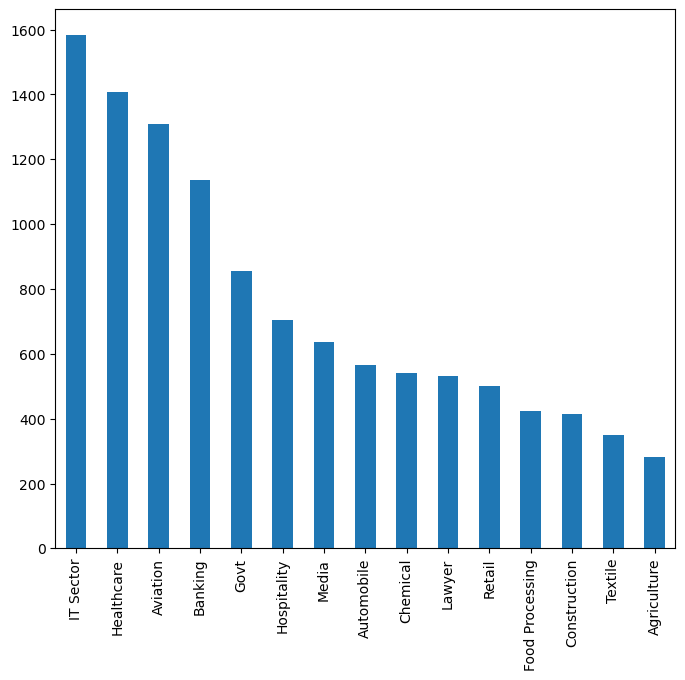

In [21]:
plt.figure(figsize=(8,7))
df['Occupation'].value_counts().plot.bar()
plt.show()

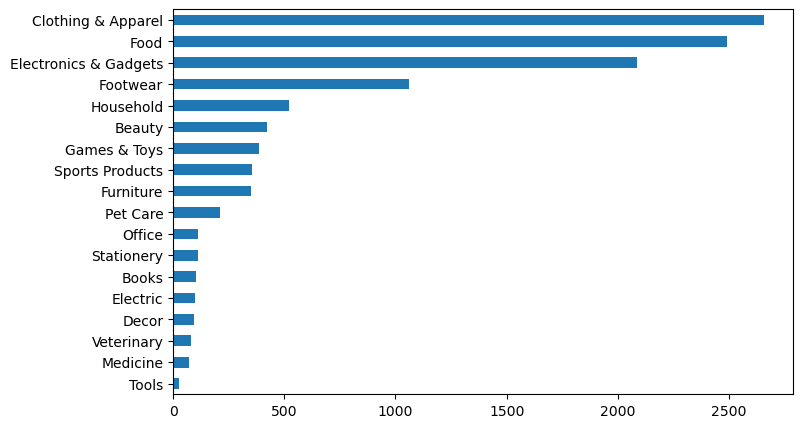

In [22]:
plt.figure(figsize=(8,5))
df['Product_Category'].value_counts().plot.barh()
plt.gca().invert_yaxis()

<p style= "background-color:brown;font-family:Georgia;color:#FEFBE9;font-size:150%;text-align:center;border-radius:50px 50px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b> EDA </b></p> 

<p style ='font-family:Lucida Console; text-align:left; color: blue;font-size:18px'> Gender </p>

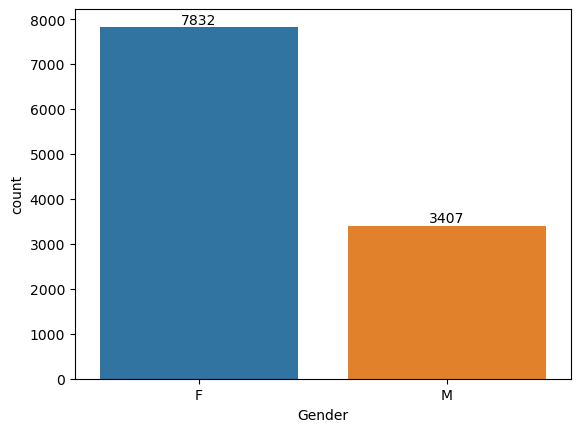

In [23]:
# Ploting a Bar for Gender Counts
ax = sns.countplot(x='Gender', data=df)

for bars in ax.containers:  # Value Representing Over the graph
    ax.bar_label(bars)

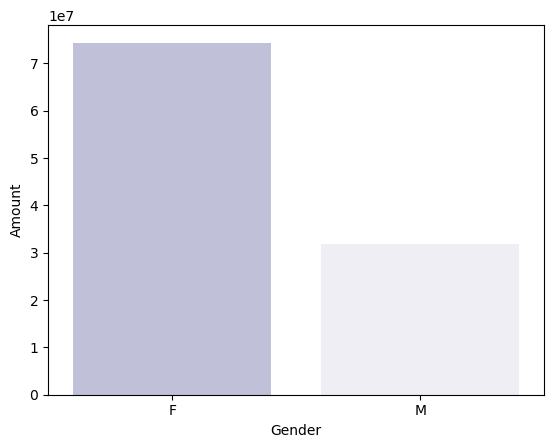

In [24]:
# Plotting a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette=["#bcbddc", "#efedf5"])
plt.show()

<div style="color:white;display:fill;
            background-color:#007d51;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:002B5B;"><b> Age </b></p>
</div>


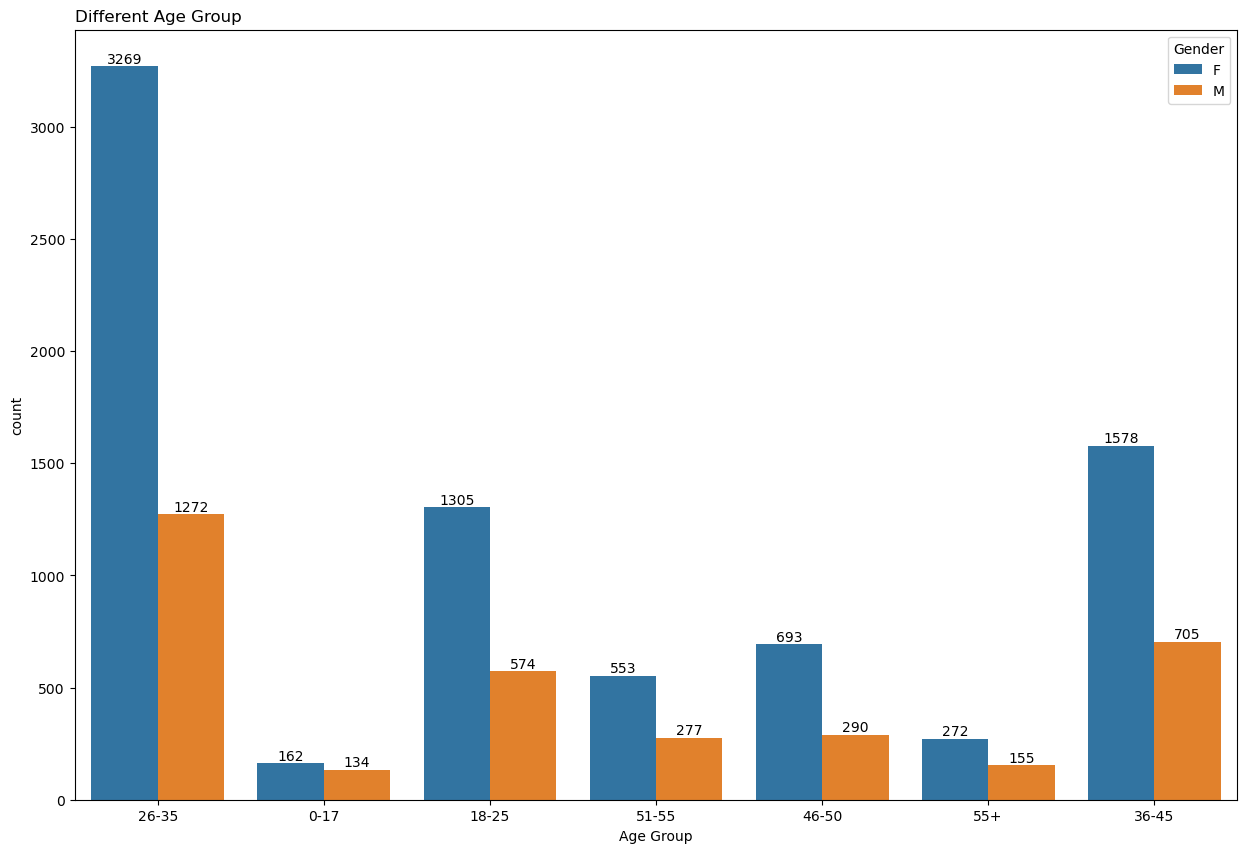

In [25]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Age Group', data=df, hue='Gender')
plt.title("Different Age Group", loc='left')

for bars in ax.containers:
    ax.bar_label(bars)

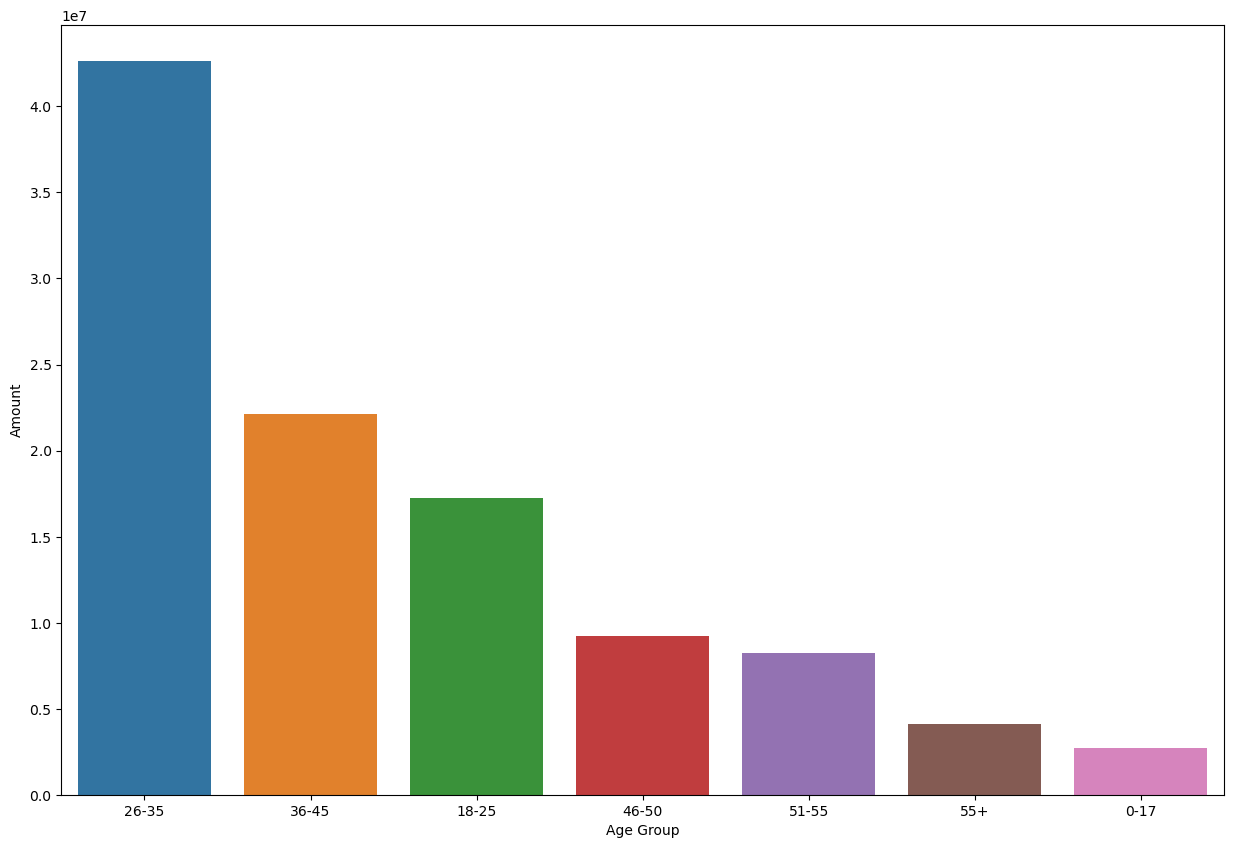

In [26]:
# Total Sales Volume-TK vs Age Group
plt.figure(figsize=(15,10))
sales_age = df.groupby(['Age Group'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot (x='Age Group', y='Amount', data= sales_age)
plt.show()

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<div style="color:white;display:fill;
            background-color:#007d51;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:002B5B;"><b> State </b></p>
</div>


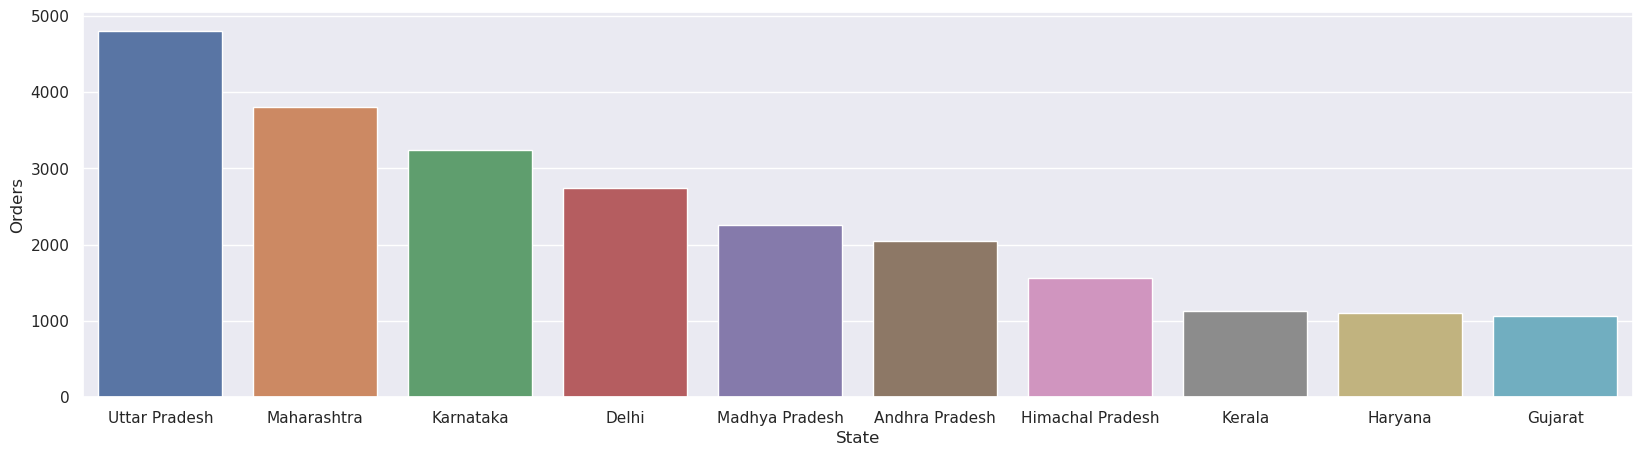

In [28]:
# Total Number of Order from Top 10 State

sales_state = df.groupby(['State'], as_index=False) ['Orders'].sum().sort_values(by='Orders', ascending=False).head(10) 
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_state, x='State', y='Orders')
plt.show()


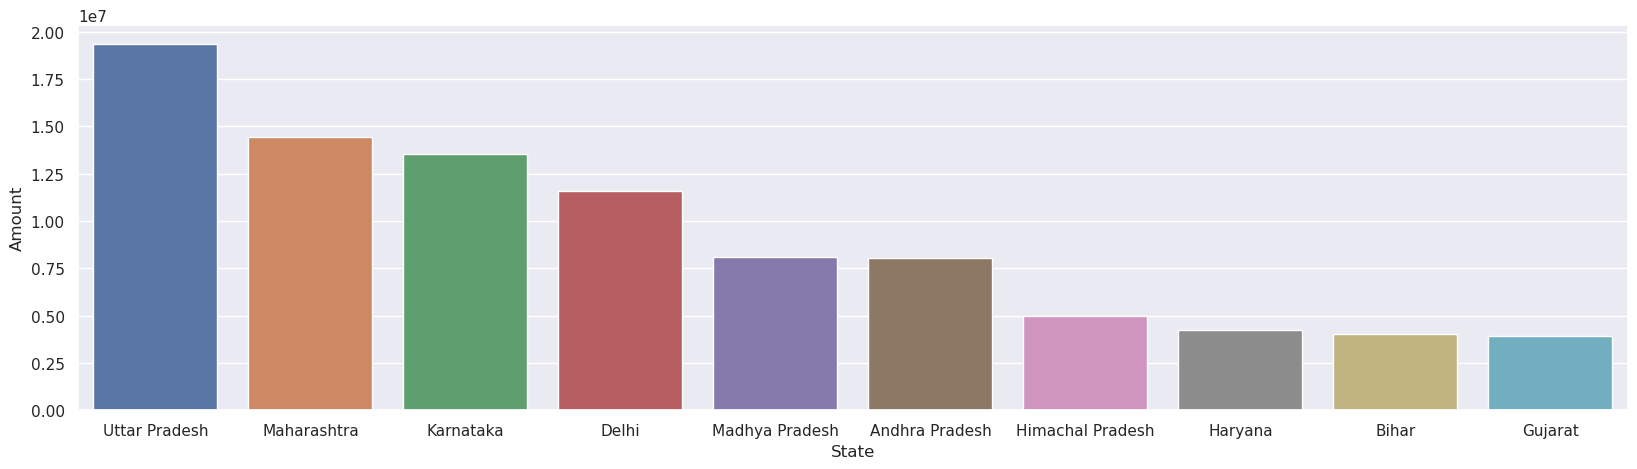

In [29]:
# Total Sales Amount from Top 10 Sates
sales_state = df.groupby(['State'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data=sales_state, x='State', y='Amount')
plt.show()


<div style="color:white;display:fill;
            background-color:#003f7d;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:002B5B;"><b> Marital Status </b></p>
</div>

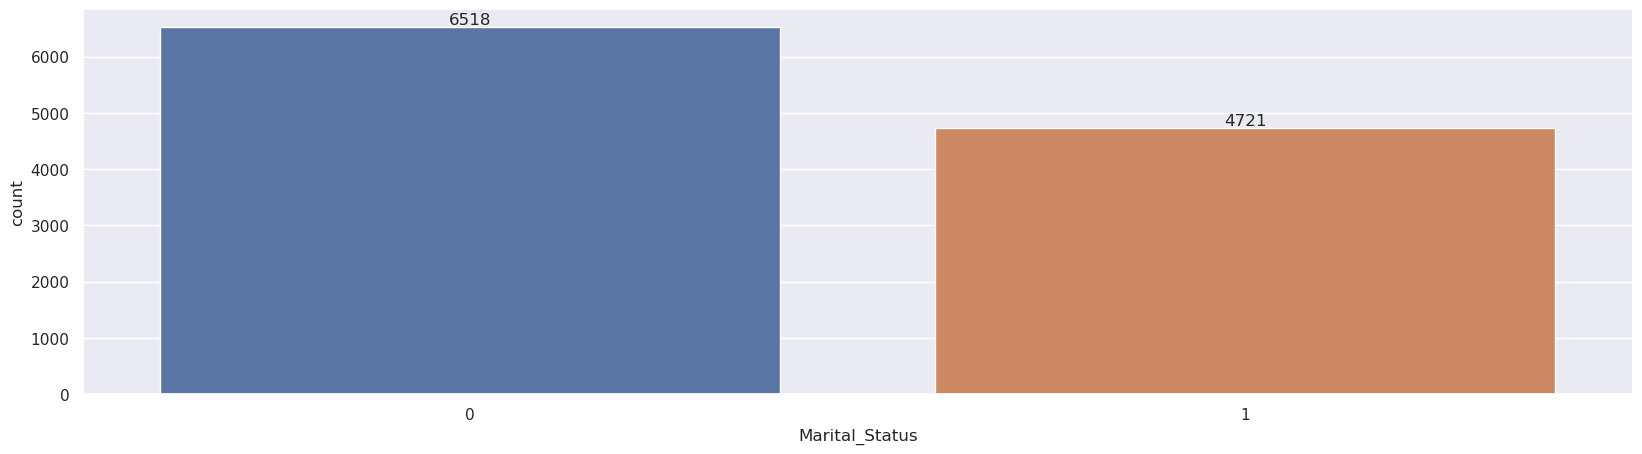

In [30]:
ax = sns.countplot(data=df, x='Marital_Status')

sns.set(rc={'figure.figsize':(15,5)})

for bars in ax.containers:
    ax.bar_label(bars)

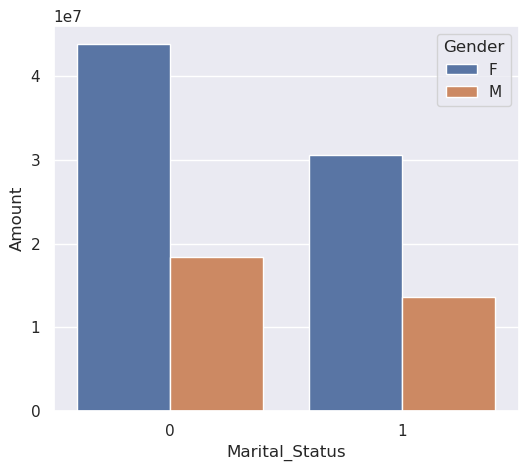

In [31]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
plt.show()

<div style="color:white;display:fill;
            background-color:#007d51;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:002B5B;"><b> Occupation </b></p>
</div>


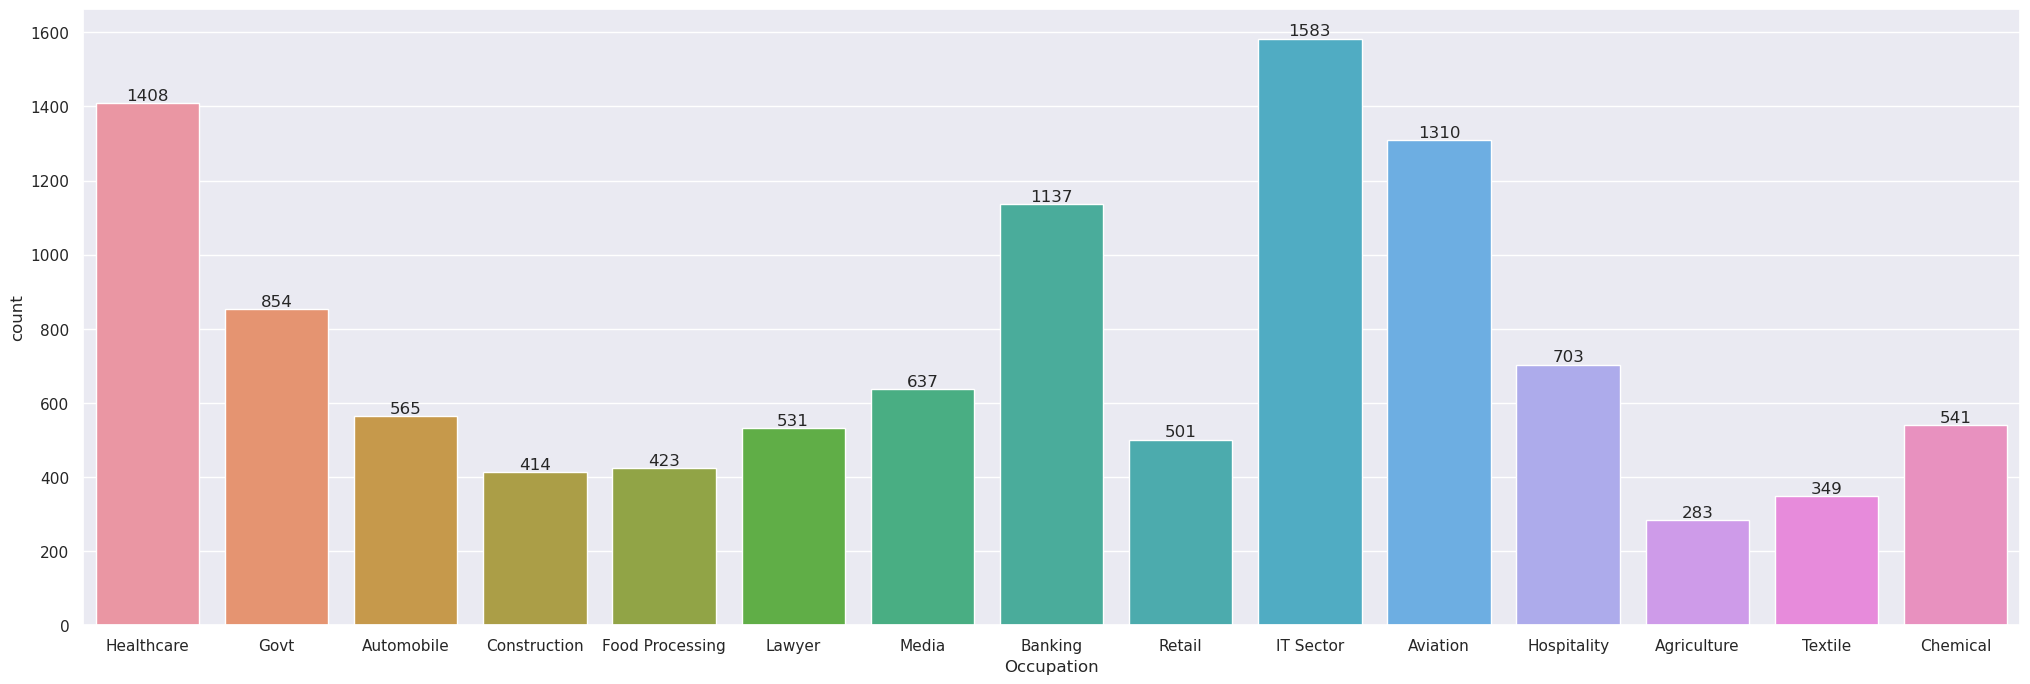

In [38]:
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.countplot(x='Occupation', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

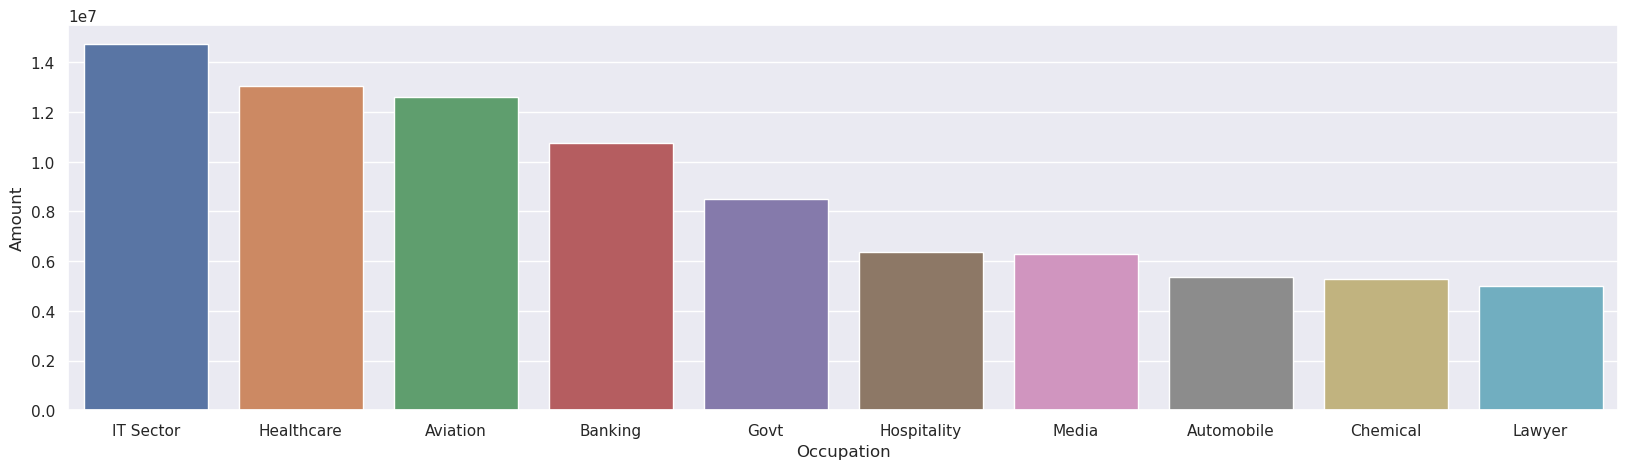

In [47]:
sales_state = df.groupby(['Occupation'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(data=sales_state, x='Occupation', y='Amount')
plt.show()

<div style="color:white;display:fill;
            background-color:#003f7d;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:002B5B;"><b> Product Category </b></p>
</div>

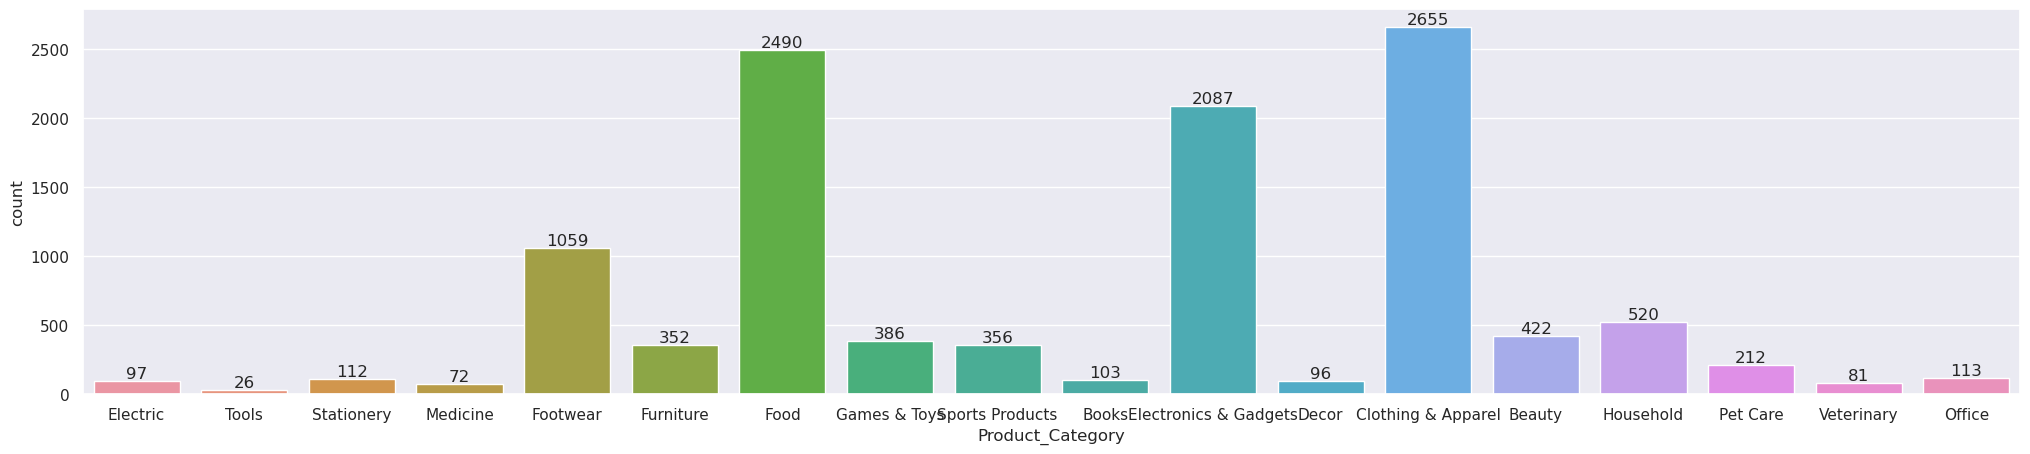

In [43]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(x='Product_Category', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

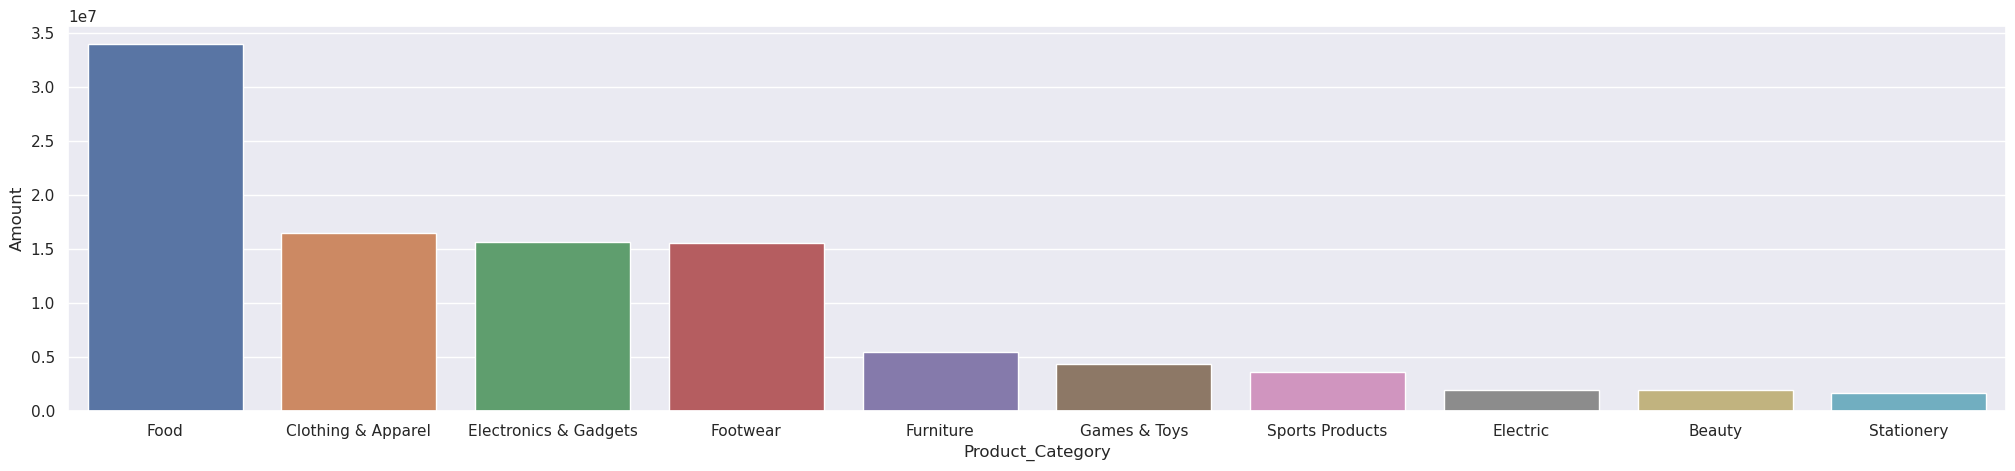

In [48]:
sales_state = df.groupby(['Product_Category'], as_index=False) ['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(data=sales_state, x='Product_Category', y='Amount')
plt.show()


<div style="color:white;display:fill;
            background-color:#007d51;font-size:100%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:002B5B;"><b> Top 10 Selling Products </b></p>
</div>

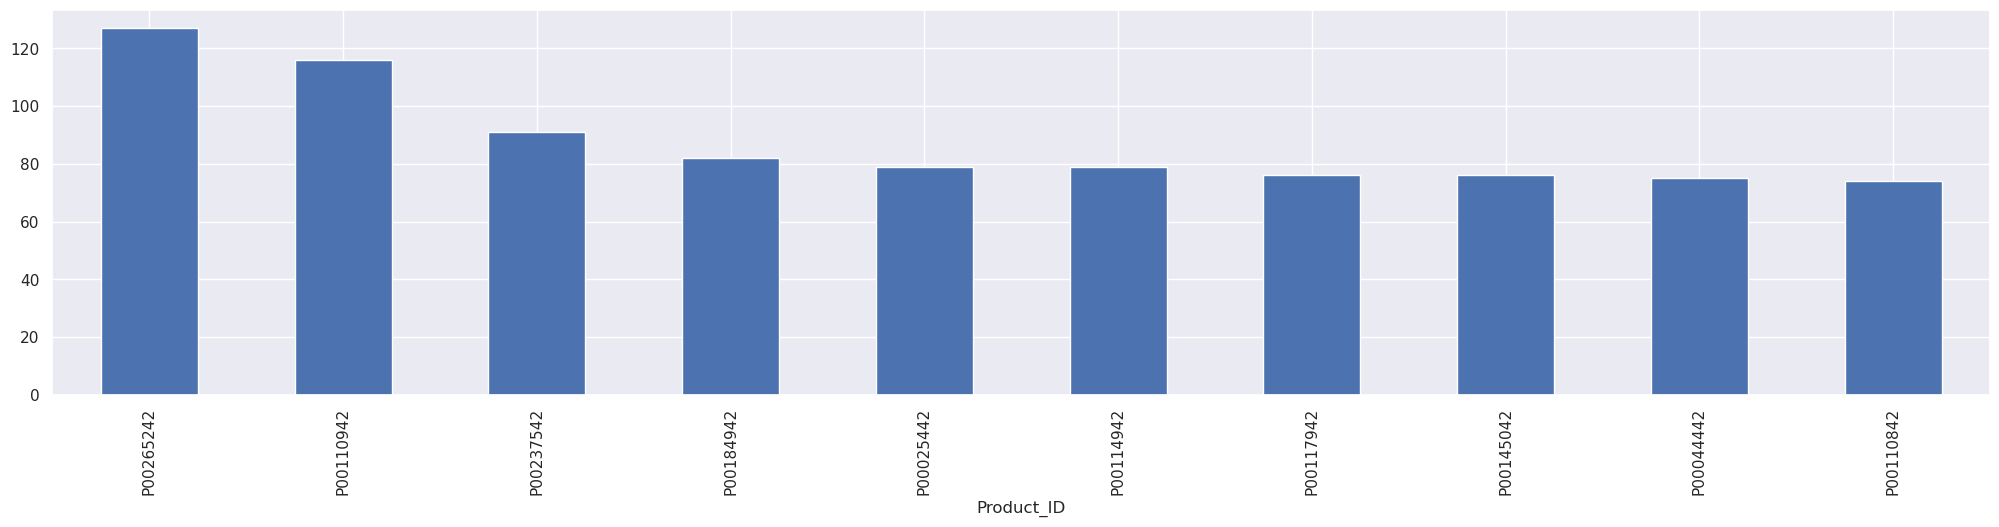

In [50]:
fig1, ax1 = plt.subplots(figsize=(25,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.show()

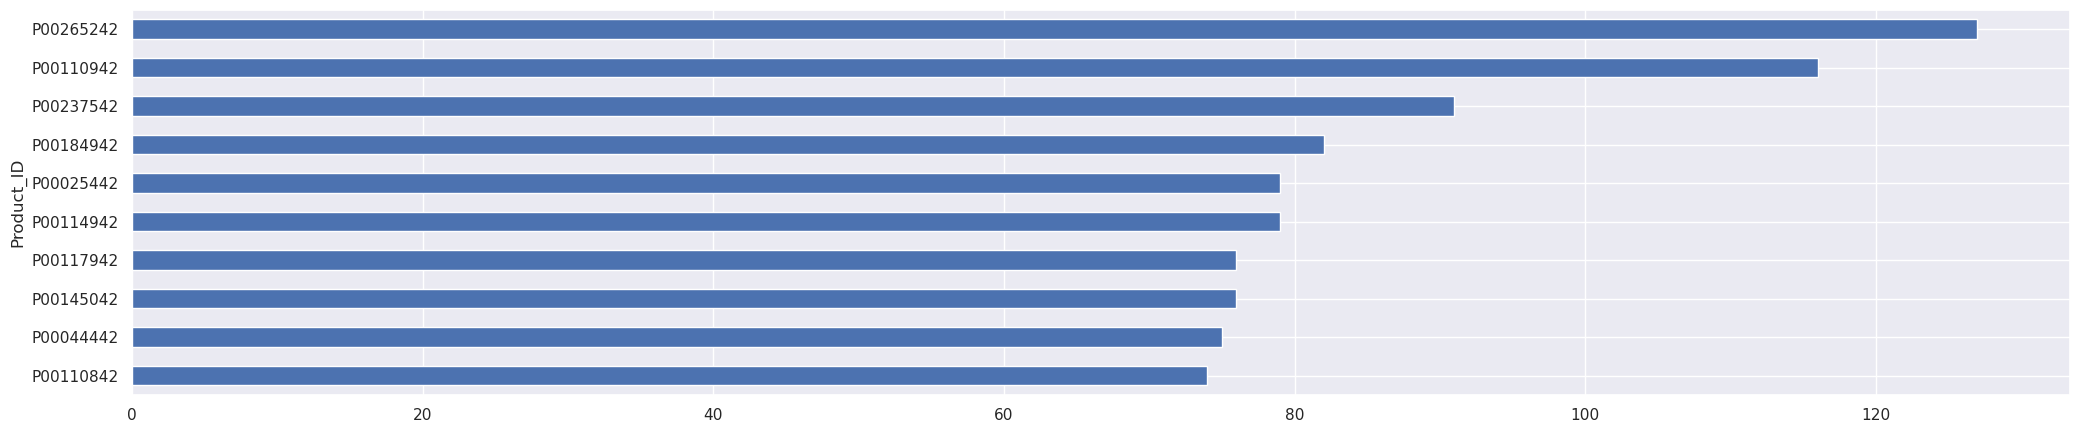

In [52]:
fig1, ax1 = plt.subplots(figsize=(25,5))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()

## **<center><span style="color:#FEF1FE;background-color:#0b032d;border-radius: 5px;padding: 5px">Thanks for reading! Please feel free to provide suggestions and be supportive :)</span></center>**

### Credit: Mishra